# Итерационные методы решения СЛАУ
## Метод Якоби
$B=D$, параметр $\tau=1$

## Метод Зейделя 
$B=L+D$, параметр $\tau=1$

## Сравнение Методов

Якоби
My time:  [0.02600884437561035, 0.031992435455322266, 0.05699944496154785, 0.11100006103515625, 0.1629948616027832]
l_time:  [0.0009942054748535156, 0.0010035037994384766, 0.0019981861114501953, 0.0020020008087158203, 0.0030014514923095703]


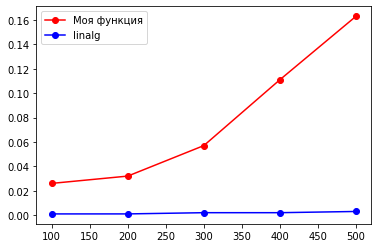

Зейдель
My time:  [0.012000083923339844, 0.02299642562866211, 0.06100177764892578, 0.09599614143371582, 0.17099428176879883]
l_time:  [0.0, 0.00099945068359375, 0.0, 0.0019986629486083984, 0.002000570297241211]


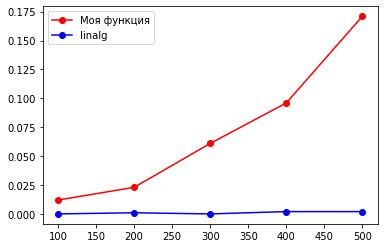

Сравнение
Якоби:  [0.04550480842590332, 0.023999929428100586, 0.05098772048950195, 0.09100008010864258, 0.1439988613128662]
Зейдель:  [0.04199981689453125, 0.02302265167236328, 0.04998373985290527, 0.09099984169006348, 0.1439962387084961]


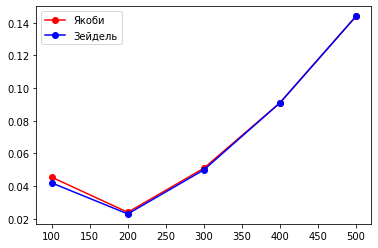

In [9]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import time
import scipy.linalg

def seidel(A, f, x):
    n = f.size
    xnew = np.zeros(n)

    for i in range(n):
        s = 0   
        for j in range(i):
            s = s + A[i][j] * xnew[j]
        for j in range(i + 1, n):
            s = s + A[i][j] * x[j]
        xnew[i] = (f[i] - s) / A[i][i]

    return xnew


def my_S(A, f):
    eps = 0.1 
    n = f.size
    x = np.zeros(n)  
    i = 0 

    while True:
        i = i + 1
        xnew = jacobi(A, f, x)
        a = np.array(xnew)
        b = np.array(x)
        if np.linalg.norm(a - b) < eps:
            break
        x = xnew[:]

    return xnew 


def main_S():
    n = 5
    k = 100
    my_time = [0] * n
    l_time = [0] * n    
    gap = [i * k for i in range(1, n + 1)]

    for i in range(0, n):   
        size = k * (i + 1)
        A = np.random.rand(size, size)
        f = np.random.rand(size)
        A = diag_domin(A, size)

        start_time = time.time()
        lib_x = np.linalg.solve(A, f)
        end_time = time.time()
        l_time[i] = end_time - start_time

        start_time = time.time()
        my_x = my_S(A, f) 
        end_time = time.time()
        my_time[i] = end_time - start_time

    print('My time: ', my_time)
    print('l_time: ', l_time)

    plt.plot(gap, my_time, 'ro-', label='Моя функция')
    plt.plot(gap, l_time, 'bo-', label='linalg')
    plt.legend()

    plt.show()


def jacobi(A, f, x):
    n = f.size
    x_new = np.zeros(n)

    for i in range(n):

        tmp = f[i]
        for j in range(n):
            if i != j:
                tmp -= A[i][j] * x[j]
        x_new[i] = tmp / A[i][i]

    return x_new





def my_J(A, f):
    eps = 0.1        
    n = f.size
    x = np.zeros(n)  
    i = 0            
    while True:
        i = i + 1
        xnew = jacobi(A, f, x)
        a = np.array(xnew)
        b = np.array(x)
        if np.linalg.norm(a-b) < eps:
            break
        x = xnew[:]

    return xnew

    

def diag(A, n):
    for i in range(n):
        s = 0
        for j in range(n):
            if i != j:
                s += abs(A[i][j])
        if (A[i][i] < 0):
            A[i][i] -= s
        else:
            A[i][i] += s
    return A



def main_J():
    n = 5
    k = 100
    my_time = [0] * n
    l_time = [0] * n
    gap = [i*k for i in range(1, n+1)]
    
    for i in range(0, n):   
        size = k * (i+1)
        A = np.random.rand(size, size)
        f = np.random.rand(size)
        A = diag(A, size) 

        start_time = time.time()
        lib_x = scipy.linalg.solve(A, f)
        end_time = time.time()
        l_time[i] = end_time - start_time

        start_time = time.time()
        my_x = my_J(A, f)     
        end_time = time.time()
        my_time[i] = end_time - start_time

    print('My time: ', my_time)
    print('l_time: ', l_time)

    plt.plot(gap, my_time, 'ro-', label='Моя функция')
    plt.plot(gap, l_time, 'bo-', label='linalg')
    plt.legend()

    plt.show()

def cmp():
    n = 5
    k =100
    my_timeJ = [0] * n
    my_timeS = [0] * n
    gap = [i*k for i in range(1, n+1)]

    for i in range(0, n):
        size = k * (i+1)
        A = np.random.rand(size, size)
        f = np.random.rand(size)
        A = diag(A, size) 

        start_time = time.time()
        my_x1 = my_J(A, f)
        end_time = time.time()
        my_timeJ[i] = end_time - start_time

        start_time = time.time()
        my_x2 = my_S(A, f)
        end_time = time.time()
        my_timeS[i] = end_time - start_time

    print('Якоби: ', my_timeJ)
    print('Зейдель: ', my_timeS)

    plt.plot(gap, my_timeJ, 'ro-', label='Якоби')
    plt.plot(gap, my_timeS, 'bo-', label='Зейдель')
    plt.legend()

    plt.show()


print('Якоби')
main_J()
print('Зейдель')
main_S()
print('Сравнение')
cmp()